### Build a Simple Workflow or Graph Using LangGraph

#### State
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

In [2]:
def start_play(state:State):
    print("Start Play node has been called")
    return {"graph_info":state["graph_info"] + "I am planning to play"}

def cricket(state:State):
    print("Cricket node has been called")
    return {"graph_info":state["graph_info"] + " Cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info'] + " Badminton"}


In [3]:
import random
from typing import Literal

def random_play(state:State)-> Literal['cricket','badminton']:
    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

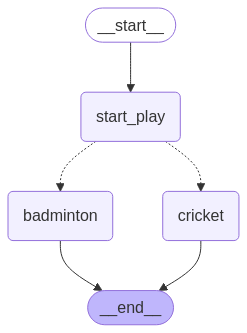

In [5]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)

## add all the nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

## Schedule the flow of the graph
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

## Complie the graph
graph_builder=graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
graph_builder.invoke({"graph_info":"My name is Krish"})

Start Play node has been called
Cricket node has been called


{'graph_info': 'My name is KrishI am planning to play Cricket'}